# Predicting Heart Disease 

Group Number: 65 | Group Members: Claire Rollins, Edward Li, Erika Kuwabara, Jeff Lu

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Introduction 

Cardiovascular disease is the leading cause of death worldwide, with an estimated 17.9 million deaths in 2019. Many factors contribute to the cause of these diseases, including age, sex, blood pressure and more. In this analysis, we will work with data collected in 1988 by researchers in Hungary, Cleveland, Switzerland, and California. Of the 76 collected attributes believed to contribute to heart disease, we will use 14 of them for our analysis.

### Columns:

|Id|Key|Description|
|-|-|-|
|1|age|in years|
|2|sex|male or female|
|3|cp|chest pain type (typical angina, atypical angina, non-anginal pain, or asymptomatic)|
|4|trestbps|resting blood pressure in mmHg|
|5|chol|serum cholesterol in mg/dl|
|6|fbs|fasting blood sugar > 120 mg/dl, true or false|
|7|restecg|resting electrocardiographic results (normal, ST-T wave abnormality, left ventricular hypertrophy)|
|8|thalach|maximum heart rate|
|9|exang|exercise induced angina, true or false|
|10|oldpeak|ST depression induced by exercise|
|11|slope|slope of peak exercise ST segment (upsloping, flat, downsloping)|
|12|ca|number of major vessels coloured by fluorosopy|
|13|thal|thalassemia, a blood disorder (normal, fixed defect, reversible defect)|
|14|num|heart condition (true or false)|
|15|location|Cleveland, Hungary, Switzerland, California|

Our goal is to answer the question: Can you predict if a patient has heart disease from these collected attributes and if so, compare the accuracy of our model to human doctors to determine if it is reliable for medical use? 

## Preliminary exploratory data analysis

In [2]:
# Download Datasets
download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/processed.cleveland.data")
download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", destfile = "data/processed.hungarian.data")
download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", destfile = "data/processed.switzerland.data")
download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", destfile = "data/processed.va.data")

In [3]:
# Load In Each Dataset
cleveland_data <- read.csv("data/processed.cleveland.data", header = FALSE, na.strings = "?")
cleveland_data <- mutate(cleveland_data, location = "Cleveland")
cleveland_data

hungarian_data <- read.csv("data/processed.hungarian.data", header = FALSE, na.strings = "?")
hungarian_data <- mutate(hungarian_data, location = "Hungary")
hungarian_data

switzerland_data <- read.csv("data/processed.switzerland.data", header = FALSE, na.strings = "?")
switzerland_data <- mutate(switzerland_data, location = "Switzerland")
switzerland_data

va_data <- read.csv("data/processed.va.data", header = FALSE, na.strings = "?")
va_data <- mutate(va_data, location = "California")
va_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0,Cleveland


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,Hungary
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,Hungary
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,NA,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1,Hungary


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1,Switzerland
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1,Switzerland
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,NA,2,114,0,1.6,2,2,NA,0,Switzerland
73,0,3,160,0,0,1,121,0,0.0,1,NA,3,1,Switzerland
74,1,2,145,0,NA,1,123,0,1.3,1,NA,NA,1,Switzerland


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2,California
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0,California
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2,California
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


In [4]:
# Merge Datasets
raw_data <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
raw_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


While wrangling, we have renamed both columns and factors to a human-legible form. The code to do so is as follows:

In [5]:
# Modify Column Names
names(raw_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num", "location")

# Interpret columns as factors
# Mappings acquired from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart_data <- raw_data |> mutate(
    sex = as.factor(sex),
    cp = as.factor(cp),
    fbs = as.logical(fbs),
    restecg = as.factor(restecg),
    exang = as.logical(exang),
    slope = as.factor(slope),
    ca = as.factor(ca),
    thal = as.factor(thal),
    num = as.factor(num > 0)
)

# Solution found online to convert numerial factors to string factors
# https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors
levels(heart_data$sex)<- c("female", "male")
levels(heart_data$cp) <- c("typical angina","atypical angina", "non-anginal pain", "asymptomatic")
levels(heart_data$restecg) <- c("normal","ST-T wave abnormality","hypertrophy")
levels(heart_data$slope) <- c("upsloping","flat","downsloping")
levels(heart_data$thal) <- c("normal", "fixed defect","reversable defect")
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>,<lgl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
63,male,typical angina,145,233,TRUE,hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,FALSE,Cleveland
67,male,asymptomatic,160,286,FALSE,hypertrophy,108,TRUE,1.5,flat,3,normal,TRUE,Cleveland
67,male,asymptomatic,120,229,FALSE,hypertrophy,129,TRUE,2.6,flat,2,reversable defect,TRUE,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,male,asymptomatic,122,223,TRUE,ST-T wave abnormality,100,FALSE,0,NA,NA,fixed defect,TRUE,California
58,male,asymptomatic,NA,385,TRUE,hypertrophy,NA,NA,NA,NA,NA,NA,FALSE,California
62,male,atypical angina,120,254,FALSE,hypertrophy,93,TRUE,0,NA,NA,NA,TRUE,California


In [6]:
set.seed(1000)
#Select only predictor variables
heart_num <- heart_data |>
    select(age, thalach, oldpeak, num)
#Split into 75% training and 25% testing
heart_split <- initial_split(heart_num, prop=0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split) 
heart_training

,age,thalach,oldpeak,num
,<dbl>,<dbl>,<dbl>,<fct>
4,37,187,3.5,FALSE
5,41,172,1.4,FALSE
6,56,178,0.8,FALSE
⋮,⋮,⋮,⋮,⋮
916,54,154,0,TRUE
918,55,100,0,TRUE
920,62,93,0,TRUE


In [7]:
options(repr.plot.height=7, repr.plot.width = 6)
# Distribution of target class
class_dist <- heart_training |>
    group_by(num) |>
    summarize(n=n())
class_dist

num,n
<fct>,<int>
FALSE,308
TRUE,381


In [8]:
# Number of observations with missing data
num_na <- heart_training |>
    filter(is.na(thalach) | is.na(oldpeak))|>
    nrow()
num_na

[1] 44

In [9]:
# Average values table of each predictor
var_means <- heart_training |>
    group_by(num)|>
    summarize(across(age:oldpeak, mean, na.rm=TRUE))
var_means

num,age,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>
FALSE,49.99675,150.2542,0.4221088
TRUE,56.43307,127.2669,1.2522727


Warning message:
“Removed 38 rows containing non-finite values (stat_bin).”


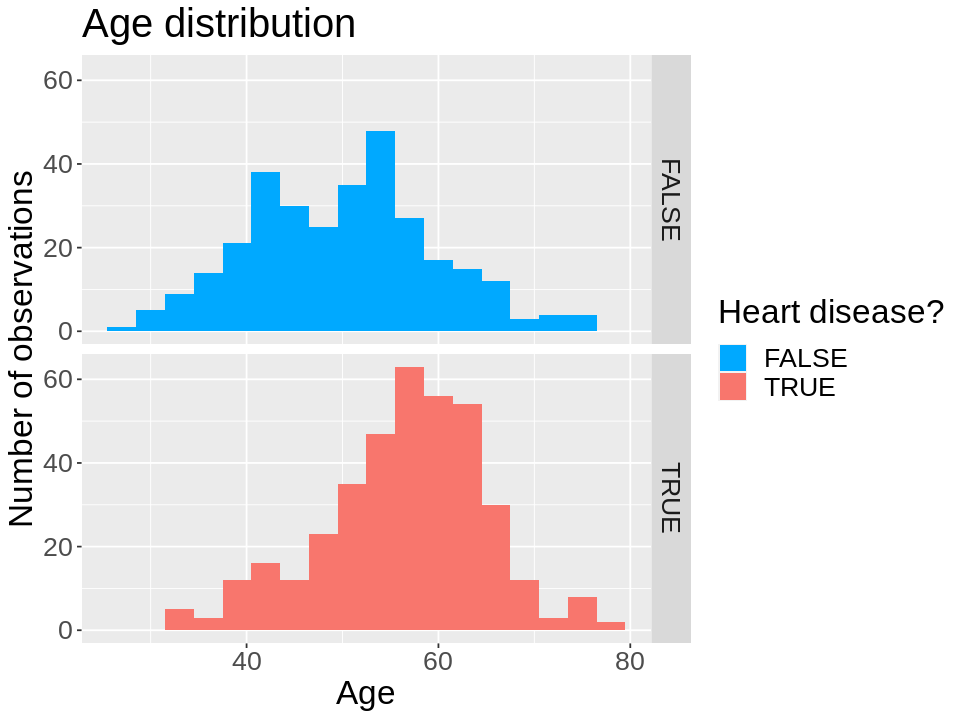

Warning message:
“Removed 43 rows containing non-finite values (stat_bin).”


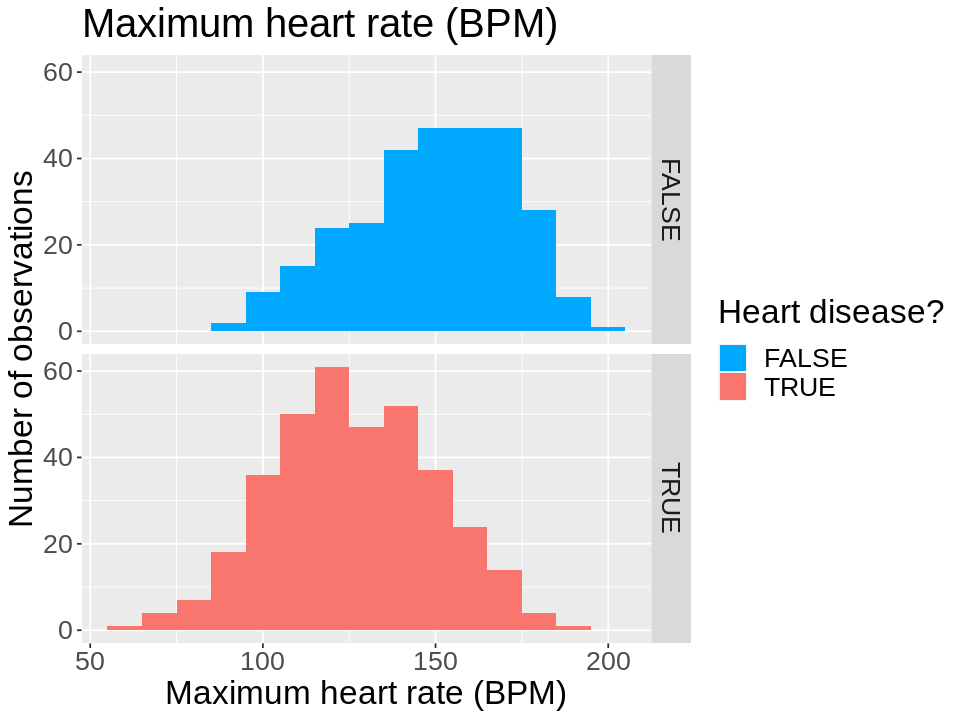

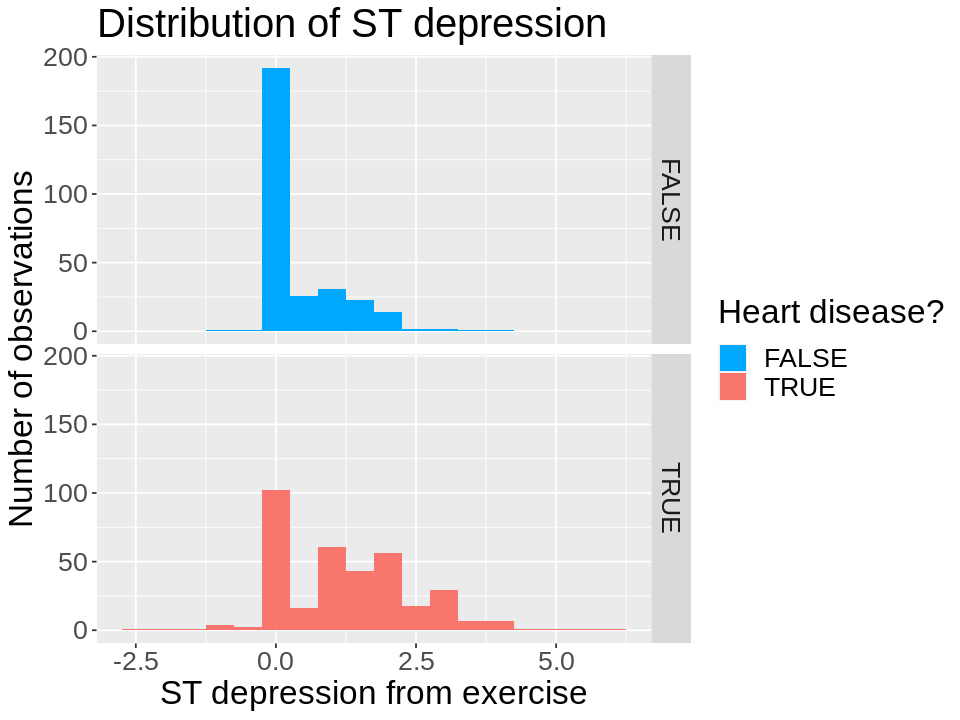

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)
# Distributions of predictor variables
age_dist <- ggplot(heart_training, aes(x=age, fill=num)) +
    geom_histogram(binwidth=3)+
    labs(x="Age", y="Number of observations",fill="Heart disease?")+
    facet_grid(rows=vars(num))+
    theme(text=element_text(size=20))+
    ggtitle("Age distribution")+
    scale_fill_manual(values=c("#00A9FF","#F8766D"))
age_dist

thalach_plot <- ggplot(heart_training, aes(x=thalach,fill=num)) +
    geom_histogram(binwidth=10)+
    labs(x="Maximum heart rate (BPM)", y="Number of observations",fill="Heart disease?")+
    facet_grid(rows=vars(num))+
    theme(text=element_text(size=20))+
    ggtitle("Maximum heart rate (BPM)")+
    scale_fill_manual(values=c("#00A9FF","#F8766D"))
thalach_plot

oldpeak_plot <- ggplot(heart_training, aes(x=oldpeak,fill=num)) +
    geom_histogram(binwidth=0.5)+
    labs(x="ST depression from exercise", y="Number of observations",fill="Heart disease?")+
    facet_grid(rows=vars(num))+
    theme(text=element_text(size=20))+
    ggtitle("Distribution of ST depression")+
    scale_fill_manual(values=c("#00A9FF","#F8766D"))
oldpeak_plot

Warning message:
“Removed 38 rows containing missing values (geom_point).”


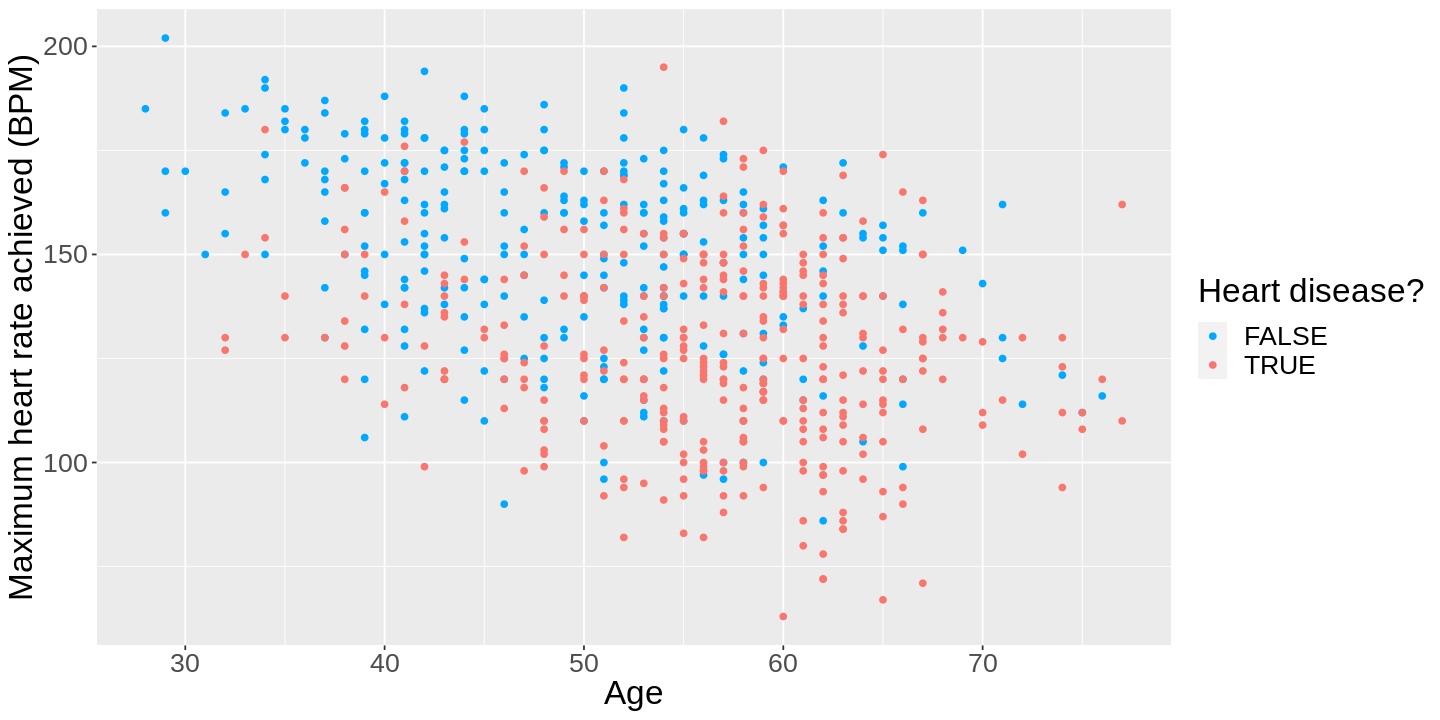

In [11]:
options(repr.plot.width=12, repr.plot.height=6)
age_plot <- ggplot(heart_training, aes(x=age, y=thalach, color=num)) +
    geom_point()+
    labs(x="Age", y="Maximum heart rate achieved (BPM)", color="Heart disease?")+
    theme(text=element_text(size=20))+
    scale_color_manual(values=c("#00A9FF","#F8766D"))
age_plot

From the plots and average tables above, we can see that patients with heart disease tend to be older, have lower maximum heart rates, and have higher ST depression.

## Methods 

We will answer our question by creating a classification model using the K-nearest neighbour with predictors of age, maximum heart rate (thalach) and ST depression (oldpeak). Through visualizations created from our preliminary analysis, we found that these three variables had the most correlation with the presence of heart disease. We will then compare predictions with the testing dataset to measure the model's accuracy. Through a decision boundary plot to visualize the KNN model, we plan to determine if heart disease models are reliable for medical use.

## Expected Outcomes and Significance 

Overall, we expect to predict heart disease from factors such as the patient's age, maximum heart rate, and ST depression induced by exercise. 

Since cardiovascular disease is one of the leading causes of mortality worldwide, it is challenging to identify heart disease due to many contributory risk factors. These predictive findings can determine patterns and relationships associated with heart disease, leading to improvements in medical services. In the future, it may be worthwhile for patients to self-diagnose or speculate about heart disease years before any symptoms arise—ultimately saving lives thanks to early intervention.

This inquiry project can lead to further questions, such as, "How can we further improve the accuracy of our model?" and "What other factors can we use to predict heart disease?"

## Sources 

Cherngs. (2020, March 29). *Heart disease Cleveland UCI.* Kaggle. Retrieved from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci 

Deshmukh, H. (2020, June 18). *Heart disease UCI-Diagnosis &amp; Prediction - Towards Data Science.* Towards Data Science. Retrieved from https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7 

Detrano, R., Janosi, A., Pfistere, M., & Steinbrunn, W. (1988). *Heart Disease Data Set.* UCI Machine Learning Repository. Retrieved from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

World Health Organization. (2021, June 11). *Cardiovascular diseases (cvds).* World Health Organization. Retrieved from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) 